# Specificity comparison

In [93]:
import pandas as pd
from katlas.data import *
from katlas.plot import *

In [94]:
pssms= pd.read_parquet('out/CDDM_pssms.parquet')

In [95]:
pssms.index = pssms.index.str.split('_').str[1]

In [96]:
spec = pssms.apply(get_specificity_flat , axis=1)

In [97]:
spec

index
SRC       0.663547
EPHA3     0.911340
FES       0.766754
NTRK3     0.720888
ALK       0.795550
            ...   
SMMLCK    2.784532
ROR1      2.815438
BRAF      2.292233
GAK       4.387741
MAST2     2.504381
Length: 329, dtype: float64

In [ ]:
info = Data.get_kinase_info()

info = info[info.pseudo=='0'].copy()

hue_group = info.set_index('kinase')['modi_group']

In [101]:
df = pd.DataFrame(spec,columns=['specificity_cddm'])

In [102]:
df['group'] = df.index.map(hue_group)

In [103]:
df=df.reset_index(names='kinase_id')

In [104]:
df

,kinase_id,specificity_cddm,group
0,SRC,0.663547,TK
1,EPHA3,0.911340,TK
2,FES,0.766754,TK
3,NTRK3,0.720888,TK
4,ALK,0.795550,TK
...,...,...,...
324,SMMLCK,2.784532,CAMK
325,ROR1,2.815438,TK
326,BRAF,2.292233,TKL
327,GAK,4.387741,Other


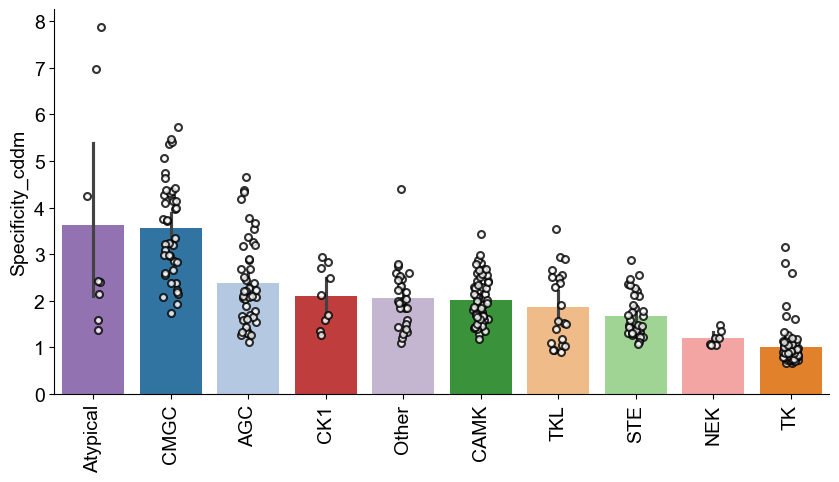

In [105]:
plot_bar(df,value='specificity_cddm',group='group',palette=group_color,figsize=(10,5))
save_svg('fig/cddm_specificity.svg')

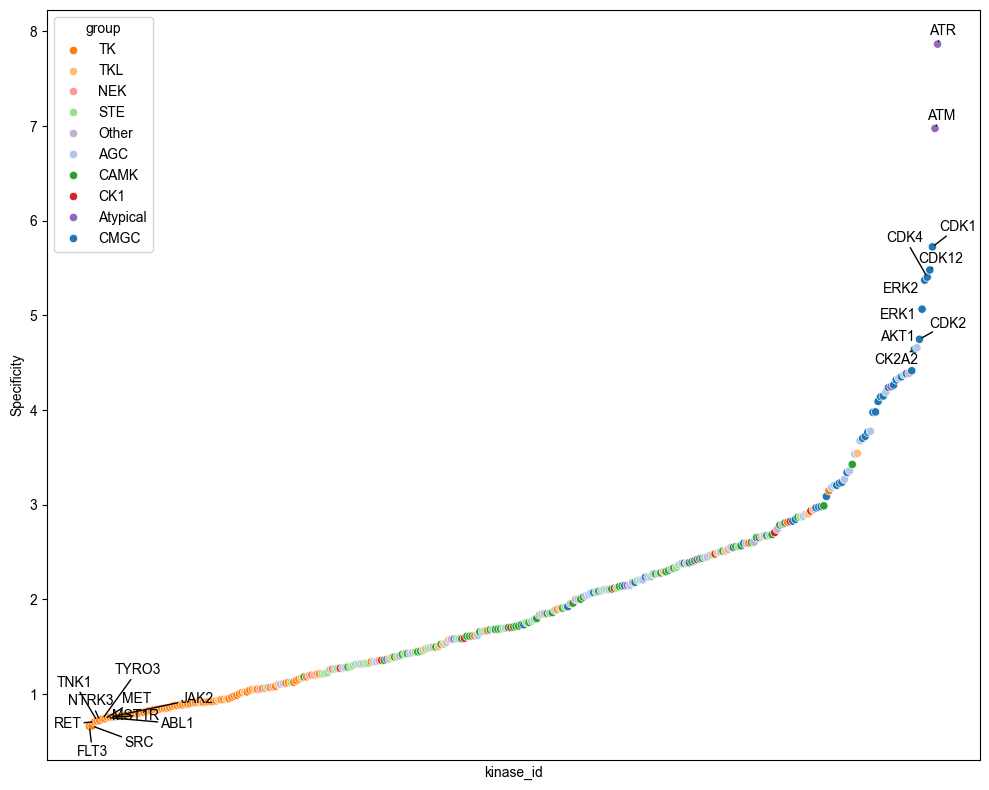

In [79]:
# plot_rank(df.sort_values('specificity_cddm'),x='kinase_id',y='specificity_cddm',hue='group',palette=group_color)

## PSPA

In [123]:
pspa = Data.get_pspa_all_scale()

In [124]:
spec = pspa.apply(get_specificity_flat , axis=1)

In [125]:
df2 = pd.DataFrame(spec,columns=['specificity_pspa'])

In [126]:
df2['group'] = df2.index.map(hue_group)

In [127]:
df2 = df2.reset_index(names=['kinase_id'])

In [128]:
df2

,kinase_id,specificity_pspa,group
0,AAK1,4.776913,Other
1,ACVR2A,1.398751,TKL
2,ACVR2B,1.213098,TKL
3,AKT1,2.981665,AGC
4,AKT2,3.363335,AGC
...,...,...,...
391,KDR,0.752196,TK
392,FLT4,0.755710,TK
393,WEE1_TYR,0.887054,NaN
394,YES1,0.507455,TK


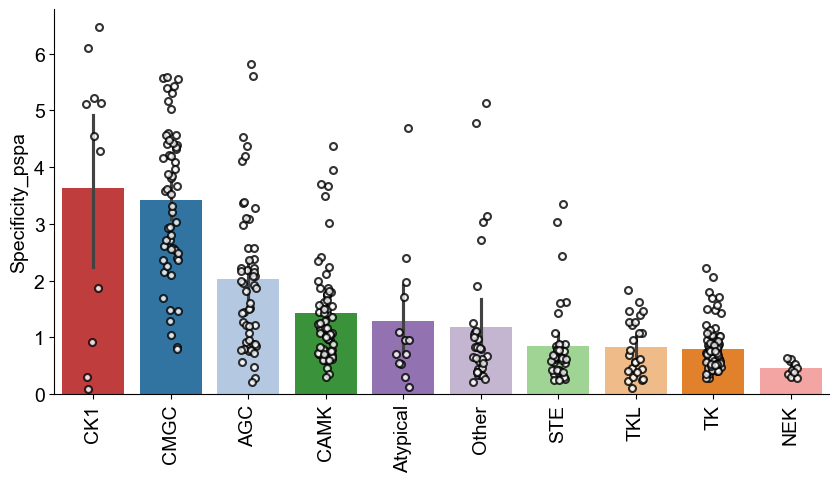

In [129]:
plot_bar(df2,value='specificity_pspa',group='group',palette=group_color,figsize=(10,5))
save_svg('fig/pspa_specificity.svg')

## Combine

In [133]:
df_comb = df.merge(df2,on='kinase_id')

In [136]:
df_comb['group'] = df_comb.kinase_id.map(hue_group)

In [137]:
df_comb

,kinase_id,specificity_cddm,group_x,specificity_pspa,group_y,group
0,SRC,0.663547,TK,0.942494,TK,TK
1,EPHA3,0.911340,TK,0.952877,TK,TK
2,FES,0.766754,TK,1.569350,TK,TK
3,NTRK3,0.720888,TK,1.074483,TK,TK
4,ALK,0.795550,TK,0.875102,TK,TK
...,...,...,...,...,...,...
307,CDC7,2.791146,Other,0.978796,Other,Other
308,CDK12,5.479276,CMGC,4.386190,CMGC,CMGC
309,SMMLCK,2.784532,CAMK,1.057586,CAMK,CAMK
310,BRAF,2.292233,TKL,0.467151,TKL,TKL


In [157]:
df_comb=df_comb.set_index('kinase_id')

In [179]:
idx1 = df_comb.specificity_cddm.sort_values(ascending=False).head(20).index

In [180]:
idx2 = df_comb.specificity_pspa.sort_values(ascending=False).head(20).index

In [181]:
idxs = set(idx1)|set(idx2)

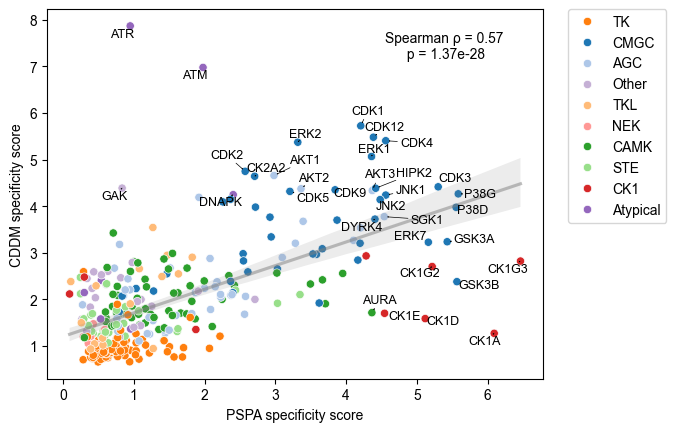

In [218]:
plot_corr(df_comb, 
          y='specificity_cddm', 
          x='specificity_pspa',
         index_list = idxs,
          text_location=(0.8,0.9),
          hue='group',
          palette=group_color,
         )
plt.xlabel('PSPA specificity score')
plt.ylabel('CDDM specificity score')
save_svg('fig/specificity.svg')